# Making a word cloud from lyrics

On 16th of July 2019 South African singer and activist [Johnny Clegg](https://www.theguardian.com/world/2019/jul/16/johnny-clegg-south-african-singer-and-activist-dies-aged-66) passed away from cancer. As my personal tribute to him I have made a wordcloud from his lyrics in his image using python. 

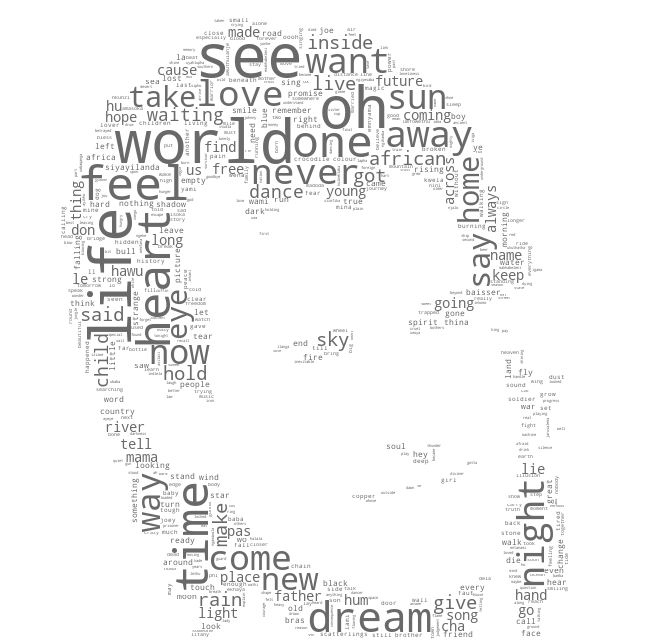

### General procedure
- scrape lyrics and combine into string
- clean text and visualise words
- process the image to be used as mask
- finalise the wordcloud and save the image

## Scrape lyrics

The lyrics were obtained from [Johnny Clegg's website](https://www.johnnyclegg.com/lyrics.html) using the `request` and `BeautifulSoup` package. The page lists all of his albums with seperate links to the lyrics for each song.

In [1]:
#Packages
import requests
from bs4 import BeautifulSoup
import re

In [2]:
# load html content
response = requests.get('http://www.johnnyclegg.com/lyrics.html')
# parse html
soup = BeautifulSoup(response.content,'html.parser')
soup

<html>
<head>
<title>Johnny Clegg lyrics</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<!-- external style sheet -->
<link href="cleggwin.css" rel="stylesheet" type="text/css"/>
<script type="text/javascript">
<!--
function MM_swapImgRestore() { //v3.0
  var i,x,a=document.MM_sr; for(i=0;a&&i<a.length&&(x=a[i])&&x.oSrc;i++) x.src=x.oSrc;
}
function MM_preloadImages() { //v3.0
  var d=document; if(d.images){ if(!d.MM_p) d.MM_p=new Array();
    var i,j=d.MM_p.length,a=MM_preloadImages.arguments; for(i=0; i<a.length; i++)
    if (a[i].indexOf("#")!=0){ d.MM_p[j]=new Image; d.MM_p[j++].src=a[i];}}
}

function MM_findObj(n, d) { //v4.01
  var p,i,x;  if(!d) d=document; if((p=n.indexOf("?"))>0&&parent.frames.length) {
    d=parent.frames[n.substring(p+1)].document; n=n.substring(0,p);}
  if(!(x=d[n])&&d.all) x=d.all[n]; for (i=0;!x&&i<d.forms.length;i++) x=d.forms[i][n];
  for(i=0;!x&&d.layers&&i<d.layers.length;i++) x=MM_findObj(n,d.layers[i].document);
  if(!

In [3]:
# extract all hyperlinks from lyrics site
a = soup.find_all('a',href=True)
href_list = [line['href'] for line in a]
href_list

['index.html',
 'scatterlings.html',
 'gallery.html',
 'tour.html',
 'biog.html',
 'lyrics.html',
 'music.html',
 'video.html',
 'agency.html',
 'links.html',
 'lyrics/human.html',
 'lyrics/human.html#gaza',
 'lyrics/human.html#calling',
 'lyrics/human.html#youbabe',
 'lyrics/human.html#asilazi',
 'lyrics/human.html#wonder',
 'lyrics/human.html#congo',
 'lyrics/human.html#hidden',
 'lyrics/human.html#thatsound',
 'lyrics/human.html#manqoba',
 'lyrics/human.html#nyembezi',
 'lyrics/human.html#magumede',
 'lyrics/onelife.html',
 'lyrics/onelife.html#1',
 'lyrics/onelife.html#2',
 'lyrics/onelife.html#3',
 'lyrics/onelife.html#4',
 'lyrics/onelife.html#5',
 'lyrics/onelife.html#6',
 'lyrics/onelife.html#7',
 'lyrics/onelife.html#8',
 'lyrics/onelife.html#9',
 'lyrics/onelife.html#10',
 'lyrics/onelife.html#11',
 'lyrics/onelife.html#12',
 'lyrics/onelife.html#13',
 'lyrics/onelife.html#14',
 'lyrics/onelife.html#15',
 'lyrics/onelife.html#16',
 'index.html',
 '#top',
 'lyrics/nws.html',
 

The desired links can easily be extracted from the list of all hyperlinks using a regex expression. 

The links to the lyrics of an album start with `lyrics/` and end in `.html`. In order to avoid loading the same content in multiple times, the song-links ending in `#No` or `#song` need to be removed from the list.

Note that the link `test/lyrics/scatterlings.htmll`, appearing at the end of the list needs to be excluded too.

In [4]:
lyrics_links = []
for href in href_list:
    match = re.findall(r'lyrics/\w+.html(?![#l])',href)
    if match:
        link = 'http://www.johnnyclegg.com/'+match[0]
        lyrics_links.append(link)

In [5]:
lyrics_links

['http://www.johnnyclegg.com/lyrics/human.html',
 'http://www.johnnyclegg.com/lyrics/onelife.html',
 'http://www.johnnyclegg.com/lyrics/nws.html',
 'http://www.johnnyclegg.com/lyrics/crocluv.html',
 'http://www.johnnyclegg.com/lyrics/hdd.html',
 'http://www.johnnyclegg.com/lyrics/scatterlings.html',
 'http://www.johnnyclegg.com/lyrics/ccbw.html',
 'http://www.johnnyclegg.com/lyrics/shadoman.html',
 'http://www.johnnyclegg.com/lyrics/afrlit.html',
 'http://www.johnnyclegg.com/lyrics/thirdworld.html']

Now we can step through the list of all links, parsing each album's website content through `BeautifulSoup` and extracting the text. Note, that in this case extracting only the body of the document leads to unexpected results. Therefore the whole document was loaded and then the header and footer removed. The lyrics are combined into one string and then saved to the file `lyrics.txt`.

In [6]:
# example of lyrics webpage
link = lyrics_links[0]
response = requests.get(link)
lyrics_soup = BeautifulSoup(response.content,'html.parser')
lyrics_text = lyrics_soup.text
lyrics_text

'\n\nJohnny Clegg\n\n\n\n\n<!--\nfunction MM_swapImgRestore() { //v3.0\n  var i,x,a=document.MM_sr; for(i=0;a&&i<a.length&&(x=a[i])&&x.oSrc;i++) x.src=x.oSrc;\n}\nfunction MM_preloadImages() { //v3.0\n  var d=document; if(d.images){ if(!d.MM_p) d.MM_p=new Array();\n    var i,j=d.MM_p.length,a=MM_preloadImages.arguments; for(i=0; i<a.length; i++)\n    if (a[i].indexOf("#")!=0){ d.MM_p[j]=new Image; d.MM_p[j++].src=a[i];}}\n}\n\nfunction MM_findObj(n, d) { //v4.01\n  var p,i,x;  if(!d) d=document; if((p=n.indexOf("?"))>0&&parent.frames.length) {\n    d=parent.frames[n.substring(p+1)].document; n=n.substring(0,p);}\n  if(!(x=d[n])&&d.all) x=d.all[n]; for (i=0;!x&&i<d.forms.length;i++) x=d.forms[i][n];\n  for(i=0;!x&&d.layers&&i<d.layers.length;i++) x=MM_findObj(n,d.layers[i].document);\n  if(!x && d.getElementById) x=d.getElementById(n); return x;\n}\n\nfunction MM_swapImage() { //v3.0\n  var i,j=0,x,a=MM_swapImage.arguments; document.MM_sr=new Array; for(i=0;i<(a.length-2);i+=3)\n   if (

In [7]:
all_lyrics = ''
for i,link in enumerate(lyrics_links):
    response = requests.get(link)
    lyrics_soup = BeautifulSoup(response.content,'html.parser')
    lyrics_text = lyrics_soup.text
    #remove header
    album_start =  lyrics_text.index('\xa0\n\n\n\n\n\n\n\n\n\n')
    #remove footer
    album_end = lyrics_text.index('New Dates')
    lyrics = lyrics_text[album_start:album_end]
    #remove white lines for viewing purposes
    lyrics = re.sub('\n\n\n*','\n',lyrics)
    print(f'{i+1})')
    print(lyrics)
    print('-'*60)
    all_lyrics += lyrics

1)
 
          Human
LOVE IN THE TIME OF GAZA
            I was born  inside the rain on a day of wonder
            Deep inside my brain memories of thunder
            I grew up a refugee, my life not fixed or free
            I know the world’s not to blame
            Cos’ everybody carries my name 
CHORUS:
            Oooh! These are my Fathers’ people – (Hawu Ngitshele!  Ngitshele! - tell me! tell me!)
            Oooh! This is where the Human tree once grew
            Oooh !  We are the  children of  a new world
            Oooh ! We have a new dream pushing through
The sky is black with gunships , but I’m dreaming of a girl
            In her eyes love   and friendship , but will she understand my world ?
            Now I’m like a windswept sea, fear  and hope washing over me
            Will she think my world is cruel , when I share my point  of view?
CHORUS
Oh …It’s a strange world …   hawu ngitshele !  Ngitshele !yeah!
            Oh ..It’s  a caged  bird …yeah!
         

2)
 
          One Life
Daughter of Eden
Chorus 
She’s the daughter of eden
            She’s sister of hope
            She’s the   mother freedom
            She’s the lover I know
            She laughs and she jokes
            She   drinks and she smokes
            And she tells it like is
            Cause her mind is an   arrow
            She can’t help herself
            It’s the truth’s magnetic pull
            It’s the   eye of the bull
            And it makes you think
            While you bleed
            What do you   really believe?
            When the chips are down
            Its people who count
            And   she fights for those
            Whose voices are drowned
            Whose voices are   drowned
            Chorus
            And she looks at the world
            Through the eyes in   her heart
            But the picture gets blurred
  ‘cause she feels every part
            and   she turns your head
            cause she’s got great legs!
     

3)
 
          New World Survivor
Into 
  The Picture
Mercy in bondage
            In the final war for peace
            Peasants, rebels, outcasts
            Citizens' police
This crazy century
            and a dazzling frontier
            And the shameless guilt of the domain of the world
            And the genocide of innocence
Hackers, slackers, generation-X 
            backpackers
            Tribesmen and rockstars on silicone screens
            Virtual emotions, digital dreams
            Rushing for tomorrow where the future used to be
Chorus
I see the picture
            I feel strong
            I see the river
            Flowing on
Do you see the picture?
            Do you feel strong?
            Do you see the river
            Flowing on and on and on?
I've been waiting for what 
            you're waiting for
            I've been knocking at the same door.
            I want to know what
            We have become.
I want to touch your face, 
            I want

4)
 
          Crocodile Love / Ya Vuka Inkunzi
Tatazela
            'Sishimane gijima ushon' ezinyangeni
            Uyamazi nkunzi emnyama? (X2)
            (Hey! unsuccessful lover man, you had better hurry to a magician,
            Do you know one called "the Black Bull"?)
            Igama lami nkunzi emnyama
            (My name is Black Bull)
            Yimi nkunzi emnyama
            (I am Black Bull)
            Ngicitha amasoka
            (I can magically defeat your rivals in love)
            'Sishimane gijima ushon' ezinyangeni
            Kuyo tatazela amasoka
            (Hey! unsuccessful lover man, hurry to a magician,
            and he will cause all your rivals to become insecure)
            Isoka latatazela
            (The amorous young buck is nervous because....)
            Intombi ifuna ukwendlala
            (The young girl wants to stay the night)
            Itshitshi limnandi, itshitshi limnandi njengoshukela
            (A virgin is sweet, a virgin is

5)
 
          Heat, Dust & Dreams
These days
Yashimbawula! (the watchman's fire is burning)
What happened to the diamonds in your eyes,
What happened to the hunger for the day's chase?
What happened to the electric smile
That danced across your face
We used to talk about changing the world
Now all you want to do is change your name
Come on baby don't surrender now
to the empty heart of these days.
We used to talk so deep into the night
You had the heart of a wild horse running
You bared your soul to me
and we both knew these days were coming
Chorus:
These days -- blood in the heavens
These days -- fire and ice
These days -- burning streets and visions
These days -- of the loveless child
Yashimbawula!
You were the reason I came here
You will always be the one I am looking for
I can't stand to see the way
these days are pushing you against the wall
Got to get up, got to move out
Face the tide beyond the door
Outside there's a whole world changing
We can't stand here, trapped inside
Let'

6)
 
          Scatterlings
 
Scatterlings of Africa
            Copper sun sinking low
            Scatterlings and fugitives
            Hooded eyes and weary brows
            Seek refuge in the night
            Chorus
            They are the scatterlings of Africa
            Each uprooted one
            On the road to Phelamanga
            Beneath the copper sun
            And I love the scatterlings of Africa
            Each and every one
            In their hearts a burning hunger
            Beneath the copper sun
            Broken wall, bicycle wheel
            African sun forging steel, singing
            Magic machine cannot match
            Human being human being
            African idea -- make the future clear
            Chorus
            They are the scatterlings of Africa
            Each uprooted one
            On the road to Phelamanga
            Beneath the copper sun
            And for the scatterlings of Africa
            The journey has begun
   

7)
 
          Cruel Crazy Beautiful World
One (Hu)'man One Vote
Bayeza abafana bancane wema
Bayeza abafana bancane wema
Baphethe iqwasha, baphethe ibazooka
Bathi "Sangena savuma thina,
Lapha abazange bengena abazali bethu
Nabadala, bayasikhalela thina ngoba asina voti."
(The young boys are coming,
the young boys are coming.
They carry homemade weapons and a bazooka.
They say "We have agreed to enter a place
that has never been entered before
by our parents or our ancestors
and they cry for us, for we do not have the right to vote.)
Hayiyaah!
The west is sleeping in a fragile freedom
Forgotten is the price that was paid
Ten thousand years of marching through a veil of tears
To break a few links in these chains
These things come to us by way of much pain
Don't let us slip back into the dark
On a visible but distant shore -- a new image of man
The shape of his own future, now in his own hands -- he says:
Chorus:
One 'man, one vote -- step into the future
One 'man, one vote -- in a unitar

8)
 
          Shadow Man
Human Rainbow
Baleka uzohaqwa!
(Escape before you are injured!)
Uwahaqwa!
(Too late he is injured!)
Webaba sicel'impilo
(Father, give us life, save our lives)
At the end of all bloody human storms
As the last embers and flames glow
We peer up into the wounded sky
And search for the human rainbow
And in the fading light I wonder why
We can never free it from the sky
Wangitshela lendaba
(You have told me of this thing)
I can see it, but never be it, until I free it
>From the sky
Chorus
Same old human story
The saddest winds do blow
While we are trapped in the language of dark history
Underneath a human rainbow
An angry young man draws in the air
Political equations
But time corrupts the fruit they bare
And leads to more desperation
While in the sky -- it's a trick of the light
Shine the colors of all creation
Chorus
Ngizokutshela!
(I will tell you, that's how it is).
Same old human story
Same old human story
Back 
Talk to the People
            There's a brawl i

9)
 
          African Litany
Impi
Chorus:
Impi! wo 'nans' impi iyeza
Obani bengathinta amabhubesi?
            All along the river Chelmsford's army lay asleep
            Come to crush the Children of Mageba
            Come to exact the Realm's price for peace
            And in the morning as they saddled up to ride
            Their eyes shone with the fire and the steel
            The General told them of the task that lay ahead
            To bring the People of the Sky to heel
            Chorus
            Mud and sweat on polished leather
            Warm rain seeping to the bone
            They rode through the season's wet weather
            Straining for a glimpse of the foe
            Hopeless battalion destined to die
            Broken by the Benders of Kings
            Vainglorious General and Victorian pride
            Would cost him and eight hundred men their lives
            Chorus
            They came to the side of the mountain
            Scouts rode out

10)
 
          Third World Child
Are You Ready
Hawu! bheka mama! oye!
          Hamb’ugadile! (be alert and be on guard)
          I feel   a river in flood in my veins
          I can feel your love in my brain
          It wants to   dance my life
          Through a hurricane
          Dance the mamba across
          The oshakati   plain
          Chorus:
          Hamb’ugadile mntanami! (be alert and be on guard my   child)
          The world has crocodile eyes
          And if you dance the
          Oshakati   mamba
          Remember to cross yourself twice --
          Are you ready
          Hawu! bheka   mama! oye!
          Hamb’ugadile! (be alert and be on guard)
          I need to sail away,   escape this cage
          I can see the sky and the milky way
          Be my lover tonight,   show me the wisdom of life
          Dance the mamba, across the oshakati   night
          Hamb’ugadile mntanami! (be alert and be on guard my child)
          The   world has crocodi

In [8]:
#save lyrics to file for good measure
with open('lyrics.txt','w') as file:
    file.write(all_lyrics)

## Cleaning the text and visualisation

The lyrics are fairly clean, but they do contain a couple of instructions and remnants from the website layout (e.g. "repeat chorus", "Back") that should be removed. The visualisation of the text is accomplished with the `wordcloud` package, which also handles tokenisation of the text and computation of the frequency dictionary of the words.

In [9]:
#Packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [10]:
# load file back into sring
with open('lyrics.txt','r') as file:
    lyrics = file.read()

In [11]:
# cleaning the string
print('Before:')
print(lyrics[:500])
lyrics = lyrics.replace('Back','')
lyrics = re.sub('Chorus','',lyrics,flags=re.I)
# remove repeats such as (X2),(repeat) etc.
lyrics = re.sub(r'\(repeat.*\)','',lyrics)
lyrics = re.sub(r'\([Xx]{1}[1-9]+\)','',lyrics)
lyrics = re.sub(r'\([1-9]+[Xx]{1}\)','',lyrics)
# remove capitalisation
lyrics = lyrics.lower()
# note: wordcloud can handle punctuation
print('-'*60)
print('After:')
print(lyrics[:500])

Before:
 
          Human
LOVE IN THE TIME OF GAZA
            I was born  inside the rain on a day of wonder
            Deep inside my brain memories of thunder
            I grew up a refugee, my life not fixed or free
            I know the world’s not to blame
            Cos’ everybody carries my name 
CHORUS:
            Oooh! These are my Fathers’ people – (Hawu Ngitshele!  Ngitshele! - tell me! tell me!)
            Oooh! This is where the Human tree once grew
            Oooh !  We are the  ch
------------------------------------------------------------
After:
 
          human
love in the time of gaza
            i was born  inside the rain on a day of wonder
            deep inside my brain memories of thunder
            i grew up a refugee, my life not fixed or free
            i know the world’s not to blame
            cos’ everybody carries my name 
:
            oooh! these are my fathers’ people – (hawu ngitshele!  ngitshele! - tell me! tell me!)
            oooh! th

In [12]:
# instantiate WordCloud
wc = WordCloud(
	collocations=False,#if set to true creates word pairs
	background_color='white',
	max_words=None,
	).generate(lyrics)

In [13]:
# frequency dictionary of words
freq_dic = wc.words_
print(f'number of words: {len(freq_dic)}')
freq_dic

number of words: 3040


{'will': 1.0,
 'day': 0.841726618705036,
 'know': 0.7266187050359713,
 'world': 0.6330935251798561,
 'see': 0.6258992805755396,
 'man': 0.6115107913669064,
 'life': 0.5899280575539568,
 'oh': 0.5827338129496403,
 'feel': 0.5755395683453237,
 'time': 0.5683453237410072,
 'heart': 0.5323741007194245,
 'one': 0.5035971223021583,
 'dream': 0.4676258992805755,
 'away': 0.4676258992805755,
 'night': 0.460431654676259,
 'love': 0.4244604316546763,
 'never': 0.4244604316546763,
 'come': 0.41007194244604317,
 'want': 0.41007194244604317,
 'sun': 0.39568345323741005,
 'now': 0.38848920863309355,
 'way': 0.3669064748201439,
 'new': 0.34532374100719426,
 'say': 0.3381294964028777,
 'take': 0.3381294964028777,
 'home': 0.3381294964028777,
 'eye': 0.3381294964028777,
 'african': 0.3381294964028777,
 'rain': 0.33093525179856115,
 'give': 0.3237410071942446,
 'live': 0.3237410071942446,
 'inside': 0.30935251798561153,
 'got': 0.30935251798561153,
 'hold': 0.302158273381295,
 'sky': 0.2949640287769784,

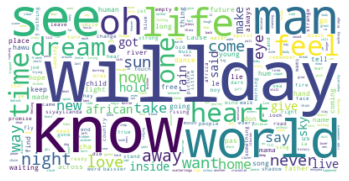

In [14]:
# visualisation
# plot wordcloud into matplotlib figure
fig,ax = plt.subplots()
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

## Image processing

In order to generate the wordcloud over an image, the image needs to be processed into an array which can be used as a mask. Black areas of the mask will be used to print words, while white areas will remain blank. The wordclod package does not work well with certain images. Best results are achieved when images are binarised to pure black and white. Image processing is performed using `PIL` and `numpy`.

In [15]:
# Packages
from PIL import Image

import numpy as np

RGB


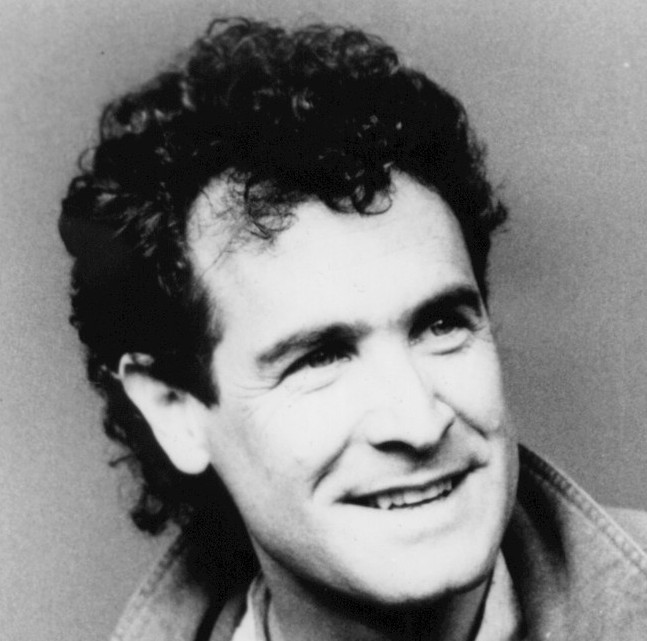

In [16]:
# load image with PIL and print mode
image_file = Image.open('johnny_mask.jpeg')
print(image_file.mode)
image_file

In [17]:
# convert image to monochrome
image_monochrome = image_file.convert('L')
print(image_monochrome.mode)

L


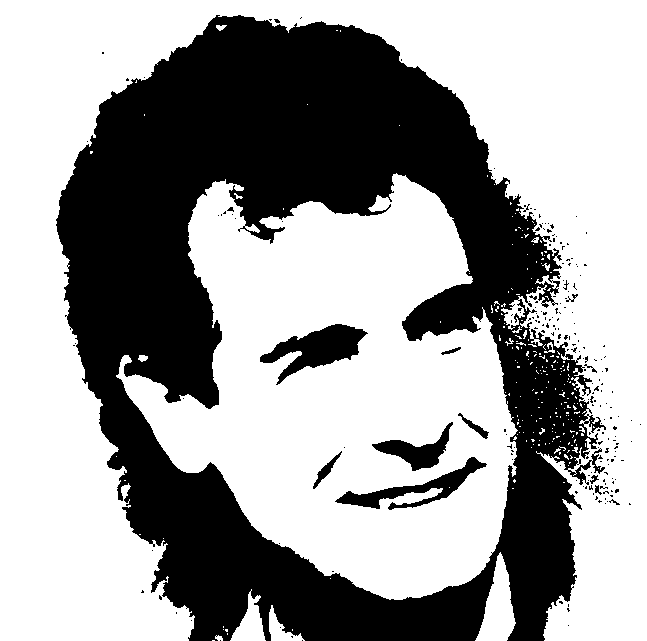

In [18]:
# transform monochrome to pure black (0) and pure white (255) image
thresh=125
binarise = lambda x : 255 if x > thresh else 0
image_binary = image_monochrome.point(binarise)
image_binary

In [19]:
# compute mask as array of image
mask_original = np.array(image_file)
mask_monochrome = np.array(image_monochrome)
mask_binary = np.array(image_binary)
print('original (RGB):')
print(mask_original[0])
print('monochrome:')
print(mask_monochrome[0][:10])
print('binary:')
print(mask_binary[0][:10])

original (RGB):
[[196 196 196]
 [192 192 192]
 [190 190 190]
 ...
 [186 186 186]
 [189 189 189]
 [192 192 192]]
monochrome:
[196 192 190 189 190 189 191 192 194 193]
binary:
[255 255 255 255 255 255 255 255 255 255]


In [20]:
# generate wordclouds with different masks
wc_original = WordCloud(
	collocations=False,#if set to true creates word pairs
	background_color='white',
    #max_words set to 100 for speed
	max_words=100,
    mask = mask_original
	).generate(lyrics)
wc_monochrome = WordCloud(
	collocations=False,#if set to true creates word pairs
	background_color='white',
	max_words=100,
    mask = mask_monochrome
	).generate(lyrics)
wc_binary = WordCloud(
	collocations=False,#if set to true creates word pairs
	background_color='white',
	max_words=100,
    mask = mask_binary
	).generate(lyrics)

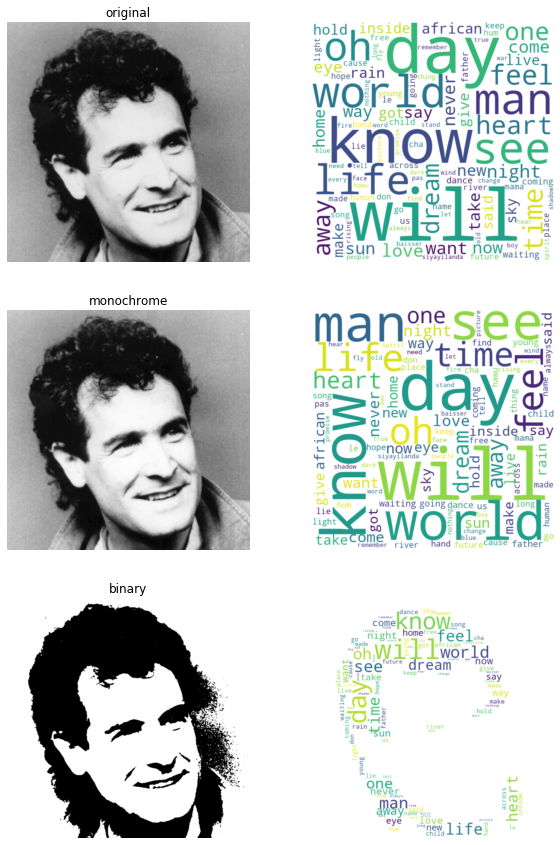

In [21]:
#vdemonstrate effect of image processing on wordcloud
fig,ax = plt.subplots(3,2,figsize= (10,15))
#plot masks
ax[0,0].imshow(mask_original,interpolation='bilinear')
ax[1,0].imshow(mask_monochrome,cmap='gray',interpolation='bilinear')
ax[2,0].imshow(mask_binary,cmap='gray',interpolation='bilinear')
#plot wordclouds
ax[0,1].imshow(wc_original,interpolation='bilinear')
ax[1,1].imshow(wc_monochrome,interpolation='bilinear')
ax[2,1].imshow(wc_binary,interpolation='bilinear')
# decorations
ax[0,0].set_title('original')
ax[1,0].set_title('monochrome')
ax[2,0].set_title('binary')
[axes.set_axis_off() for axes in ax.ravel()]
plt.show()

### A note on displaying monochrome images with plt.imshow()
When plotting arrays of images using `plt.imshow()` matplotlib uses the default colormap 'Viridis'. This means that monochrome images are displayed in yellow/purple by default. In order to display monochrome images in graysacale the colormap needs to be changed using `cmap="gray"` or the array needs to be reshaped to reflect the RGB values, as shown below.

In [22]:
print('Original array shape (RGB): ',mask_original.shape)
print('Binary array shape (L): ',mask_binary.shape)
# reshape array
binary_RGB = []
for _ in mask_binary:
    RGB = []
    for L in _:
        RGB.append([L,L,L])
    binary_RGB.append(np.array(RGB))
binary_RGB = np.array(binary_RGB)
print('Reshaped binary array (RGB): ',binary_RGB.shape)

Original array shape (RGB):  (641, 647, 3)
Binary array shape (L):  (641, 647)
Reshaped binary array (RGB):  (641, 647, 3)


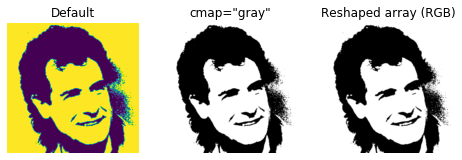

In [23]:
fig,ax = plt.subplots(1,3,figsize=(8,20))
ax[0].imshow(mask_binary,interpolation='bilinear')
ax[1].imshow(mask_binary,cmap='gray',interpolation='bilinear')
ax[2].imshow(binary_RGB,interpolation='bilinear')
#decorations
ax[0].set_title('Default')
ax[1].set_title('cmap="gray"')
ax[2].set_title('Reshaped array (RGB)')
[axes.set_axis_off() for axes in ax.ravel()]
plt.show()

## Finalising the wordcloud

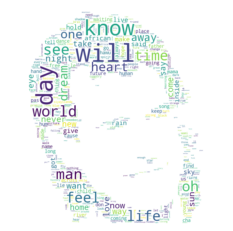

In [24]:
# use array of binary image as mask
mask = mask_binary
# instantiate WordCloud
wc = WordCloud(
	collocations=False,#if set to true creates word pairs
	background_color='white',
	max_words=None,
    mask=mask,
	).generate(lyrics)
fig,ax = plt.subplots()
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

A couple of improvements can be made to make the image visually more appealing.

Words that appear very frequently are dominating the wordcloud and making it more difficult to see less frequent words. Therefore frequent words are removed from the cloud and a maximum font size is set.

The default colormap for the wordcloud is the matplotlib colormap 'viridis'. However, the image becomes more clear when a single color is used for the words. Wordcloud accepts any [matplotlib colors](https://matplotlib.org/examples/color/named_colors.html).

In [25]:
# remove frequent words
rm_list = ['will','day','man','know']
for word in rm_list:
     lyrics = lyrics.replace(word,'')

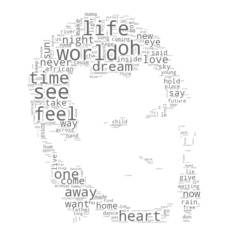

In [26]:
wc = WordCloud(
	collocations=False,#if set to true creates word pairs
	background_color='white',
	max_words=None,
    max_font_size=60,
    color_func=lambda *args, **kwargs: "dimgray",
    mask=mask,
	).generate(lyrics)
fig,ax = plt.subplots()
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
#saving the wordcloud
wc.to_file('johnnyclegg_wc.png')

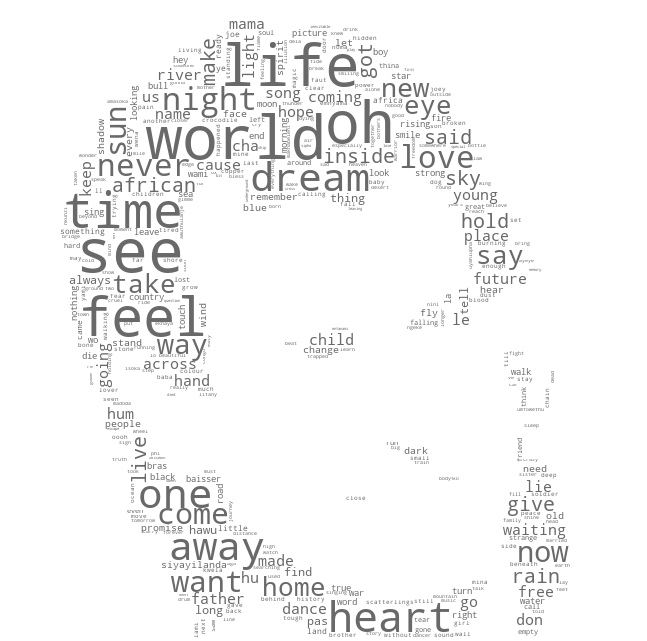

In [28]:
Image.open('johnnyclegg_wc.png')